In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

### 일변량

In [2]:
def f(x):
    y = x**5 - 8*x**3 + 10*x + 6
    return y

In [3]:
x = sp.Symbol('x')

df = sp.diff(f(x), x)
derv = sp.lambdify(x, df, 'numpy')

df2 = sp.diff(df, x)
derv2 = sp.lambdify(x, df2, 'numpy')

In [4]:
def uni_newton(f, derv, derv2, x, maxiter=1000, TOL=1e-4, verbose=True):
    
    y_prev = f(x)
    
    flag = True
    i = 1
    
    while flag:
        x = x - derv(x) / derv2(x)
        y = f(x)
        
        if verbose:
            print(f'{i}: y {y:.4f}, x {x}')
            
        if abs(y_prev - y) < TOL * (abs(y_prev) + TOL) or i >= maxiter:
            flag = False
        
        y_prev = y
        
        i += 1
        
    return i, y, x

In [5]:
x_ = -2.
uni_newton(f, derv, derv2, x_)

1: y 18.2541, x -2.09375
2: y 18.2588, x -2.083191640773439
3: y 18.2588, x -2.0830439415496738


(4, 18.258776371635324, -2.0830439415496738)

In [6]:
x_ = -1.
uni_newton(f, derv, derv2, x_)

1: y 1.5700, x -0.6785714285714286
2: y 1.5700, x -0.678916872445483


(3, 1.5700471932271682, -0.678916872445483)

In [7]:
def secant(f, derv, x0, x1, epsilon=1e-7, maxiter=1000, TOL=1e-4, verbose=True):
    
    y_prev = f(x0)
    
    flag = True
    i = 1
    
    while flag:
        x = x1 - ((x1-x0) / (derv(x1)-derv(x0)+epsilon))*derv(x1)
        y = f(x)
        
        if verbose:
            print(f'{i}: y {y:.4f}, x {x}')
            
        if abs(y_prev - y) < TOL * (abs(y_prev) + TOL) or i >= maxiter:
            flag = False
        
        y_prev, x0, x1 = y, x1, x
        
        i += 1
        
    return i, y, x1

In [8]:
secant(f, derv, -2, -1.9)

1: y 18.2298, x -2.1094990457067073
2: y 18.2566, x -2.0756495693716843
3: y 18.2588, x -2.0827912875794885
4: y 18.2588, x -2.0830463853224876


(5, 18.258776371388443, -2.0830463853224876)

In [9]:
secant(f, derv, -1, -0.9)

1: y 1.5703, x -0.683154381863954
2: y 1.5700, x -0.6791473814794973
3: y 1.5700, x -0.6789172010733289


(4, 1.570047193228989, -0.6789172010733289)

### 다변량

In [12]:
def draw_booth(levels):
    
    boothfunction = lambda x1, x2: (x1 + 2*x2 - 7)**2 + (2*x1 + x2 - 5)**2
    
    X1, X2 = np.meshgrid(np.linspace(-10.0, 10.0, 400), np.linspace(-10.0, 10.0, 400))
    Y = boothfunction(X1, X2)
    
    plt.figure(figsize=(8, 8))
    plt.contour(X1, X2, Y, np.logspace(-2.0, 2.0, levels, base=10))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

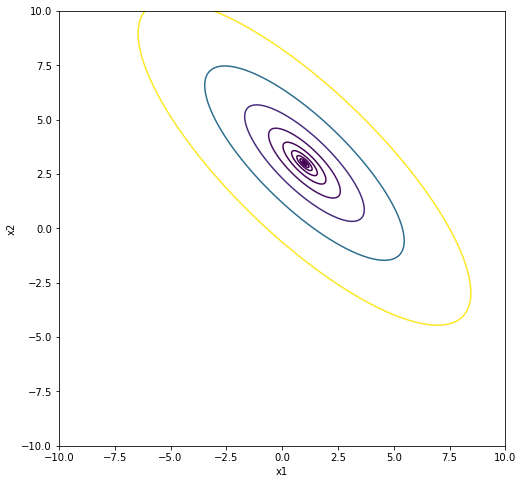

In [13]:
draw_booth(10)

In [14]:
def f(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

In [15]:
x = sp.IndexedBase('x')
gradients = np.array([sp.diff(f(x), x[i]) for i in range(2)])
grads = sp.lambdify(x, gradients, 'numpy')

In [16]:
hessian = np.asarray([[sp.diff(gradients[i], x[j]) for i in range(2)] for j in range(2)])

In [18]:
gradients

array([10*x[0] + 8*x[1] - 34, 8*x[0] + 10*x[1] - 38], dtype=object)

In [19]:
hessian #정방행렬, 대칭행렬 -> 분산,공분산 행렬과 유사

array([[10, 8],
       [8, 10]], dtype=object)

In [20]:
hess = sp.lambdify(x, hessian, 'numpy')

In [24]:
x_ = [1., 1.]
x_ - np.dot(np.linalg.inv(hess(x_)), grads(x_))

array([1., 3.])

In [25]:
def newton(f, grads, hessian, x, maxiter=1000, TOL=1e-4, verbose=True):
    
    y_prev = f(x)
    
    flag = True
    i = 1
    
    while flag:
        
        x = x - np.dot(np.linalg.inv(hess(x)), grads(x))
        y = f(x)
        
        if verbose:
            print(f'{i}: y {y:.4f}, x {x}')
            
        if abs(y_prev - y) < TOL * (abs(y_prev) + TOL) or i >= maxiter:
            flag = False
        
        y_prev = y
        
        i += 1
        
    return i, y, x

In [26]:
newton(f, grads, hess, x_)

1: y 0.0000, x [1. 3.]
2: y 0.0000, x [1. 3.]


(3, 0.0, array([1., 3.]))

In [28]:
# Rosenbrock
def f(x, a=1, b=5):
    y = (a - x[0])**2 + b*(x[1] - x[0]**2)**2
    return y

In [29]:
x = sp.IndexedBase('x')
gradients = np.array([sp.diff(f(x), x[i]) for i in range(2)])
grads = sp.lambdify(x, gradients, 'numpy')

hessian = np.asarray([[sp.diff(gradients[i], x[j]) for i in range(2)] for j in range(2)])
hess = sp.lambdify(x, hessian, 'numpy')

In [30]:
x_ = [-2., 2.]
newton(f, grads, hess, x_)

1: y 8.1653, x [-1.85714286  3.42857143]
2: y 158.7509, x [ 0.5157385  -5.36457973]
3: y 0.2264, x [0.524189  0.2747027]
4: y 0.2555, x [0.99966046 0.77324793]
5: y 0.0000, x [0.99976459 0.99952923]
6: y 0.0000, x [1.         0.99999994]
7: y 0.0000, x [1. 1.]


(8, 5.053640174072107e-31, array([1., 1.]))